# Trabalho 2 - Mineração de Dados DCC127 - 20-01-2020
## Professor: Heder Soares Bernardino
### Lucas Augusto Muller
### Pedro Henrique Muniz


#### A base de dados fornecida foi lida a fim de entender e caracterizar seus dados. Neste caso, a base utilizada possui 11 atributos (colunas) e 1632 registros (linhas). Apenas imprimindo-a, nota-se que é uma base de dados referente a jogos eletrônicos, possuindo informações como nome, plataforma, gênero, avaliações, vendas, fabricante, etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import IPython.display
from pandas.plotting import scatter_matrix
# import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/mineracao-de-dados_trabalho2_dados/trabalho2_dados_5.csv')
display(df)

print("DataFrame Shape: {}".format(df.shape))

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Legend of the Dragon,Wii,Fighting,Game Factory,0.06,1-May-07,37.0,14.0,4.8,5.0,Neko Entertainment
1,Kawashima Ryuuta Kyouju Kanshuu Nouryoku Train...,PSP,Misc,Sega,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2,Backyard NFL Football '10,X360,Sports,Atari,0.10,NaN,NaN,NaN,NaN,NaN,NaN
3,Payday 2,PS3,Action,505 Games,0.22,13-Aug-13,74.0,12.0,7.2,106.0,Overkill Software
4,NBA 2K11,Wii,Sports,Take-Two Interactive,0.47,19-Oct-10,NaN,NaN,tbd,NaN,Visual Concepts
...,...,...,...,...,...,...,...,...,...,...,...
1627,Backyard Sports: Sandlot Sluggers,X360,Sports,Atari,0.08,25-May-10,NaN,NaN,3.8,4.0,HB Studios Multimedia
1628,Sengoku Hime 3: Tenka o Kirisaku Hikari to Kage,PSP,Action,SystemSoft,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1629,Sengoku Musou 3 Empires,PS3,Action,Tecmo Koei,0.14,NaN,NaN,NaN,NaN,NaN,NaN
1630,X-Men: Destiny,PS3,Action,Activision,0.21,27-Sep-11,50.0,33.0,4.8,31.0,Silicon Knights


DataFrame Shape: (1632, 11)


#### Inicialmente foram impressos os tipos de dados de cada coluna. As colunas "vendas", "avaliacao-criticos", "numero-criticos" e "numero-usuarios" são do tipo float64 e "nome", "plataforma", "genero", "editora", "lancamento", "avaliacao-usuarios" e "fabricante" são do tipo object. Ao examinarmos as colunas e seus tipos, a coluna "avaliacao-usuarios" se destaca por ser do tipo object e não float64 ou int.

#### Foi observado a quantidade de valores "NaN" (valores faltantes) em cada uma das colunas. Além disso, plotamos um gráfico de barras com o número de vendas dos 10 jogos mais vendidos.

Nome da Coluna 		 Tipo


nome                   object
plataforma             object
genero                 object
editora                object
vendas                float64
lancamento             object
avaliacao-criticos    float64
numero-criticos       float64
avaliacao-usuarios     object
numero-usuarios       float64
fabricante             object
dtype: object


Contagem de NaN


nome                    0
plataforma              0
genero                  0
editora                 3
vendas                  0
lancamento            472
avaliacao-criticos    716
numero-criticos       716
avaliacao-usuarios    492
numero-usuarios       770
fabricante            480
dtype: int64

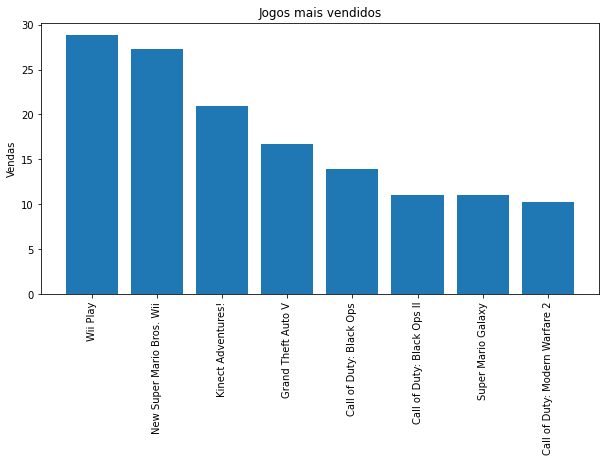

In [ ]:
print("Nome da Coluna \t\t Tipo")
display(df.dtypes)

print('\nContagem de NaN')
display(df.isna().sum())

# print(df.sort_values(by=["vendas"], ascending=False)[:10].index.tolist())
# print(df.sort_values(by=["vendas"], ascending=False)[:10].values.tolist())

plt.figure(figsize=(10,5))
plt.bar(x=[item[0] for item in df.sort_values(by=["vendas"], ascending=False)[:10].values.tolist()], height=[item[4] for item in df.sort_values(by=["vendas"], ascending=False)[:10].values.tolist()])
plt.xticks(rotation=90)
plt.title('Jogos mais vendidos')
plt.ylabel('Vendas')
plt.show()

#### Foram impressas as colunas, bem como a quantidade de vezes em que cada atributo específico aparece na tabela, podendo dessa forma identificar de forma direta quais as plataformas que possuem mais jogos, se existem jogos "repetidos", quantidade de jogos de cada gênero e assim sucessivamente.
#### Percebe-se que existem alguns jogos "repetidos", entretanto isso ocorre pois alguns são multiplataforma, então existem registros com mesmo nome, porém com diferentes atributos de vendas, plataforma, etc. Fica claro que a quantidade de jogos disponíveis para Wii, PSP, X360 e PS3 é significativamente maior do que as demais plataformas, assim como o gênero mais presente é o de ação, seguido por esportes e "diversos". As editoras Electronic Arts, Activision, Ubisoft e Namco Bandai Games possuem, respectivamente, o maior número de jogos. Percebe-se tambem que uma grande parcela da base dados não possui o fabricante definido, o que pode se tornar um problema ao realizar algumas análises.

In [ ]:
for col in df.columns:
    print("\nColumn: {}".format(col))
    print(df[col].value_counts(normalize=False, dropna=False))


Column: nome
Madden NFL 11                                         4
FIFA Soccer 14                                        4
Major League Baseball 2K12                            4
Disney Sing It! High School Musical 3: Senior Year    3
Army of Two: The 40th Day                             3
                                                     ..
Cooking Mama: Cook Off                                1
Rock Band Country Track Pack 2                        1
Dynasty Warriors                                      1
Ouchi Mainichi Tamagotchi                             1
Too Human                                             1
Name: nome, Length: 1419, dtype: int64

Column: plataforma
Wii     426
PSP     371
X360    346
PS3     320
3DS      92
PSV      38
WiiU     26
XOne      7
PS4       6
Name: plataforma, dtype: int64

Column: genero
Action          375
Sports          279
Misc            179
Adventure       153
Shooter         141
Role-Playing    124
Racing          108
Fighting        

#### Para algumas das análises feitas anteriormente, foram gerados os gráficos de barras, representando de forma mais clara as informações anteriores. No caso, foram gerados os gráficos de quantidade de jogos por plataforma e genêro.

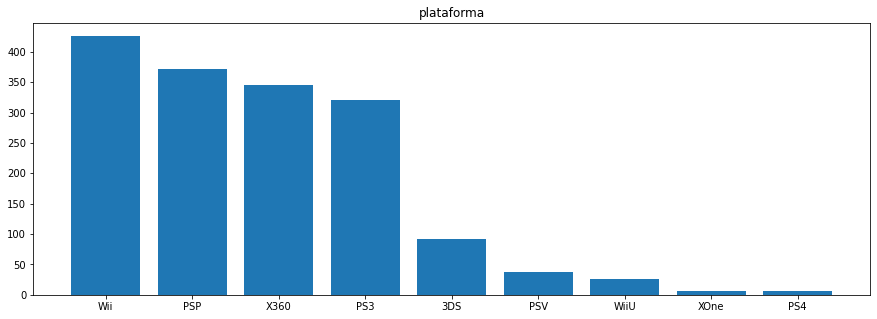

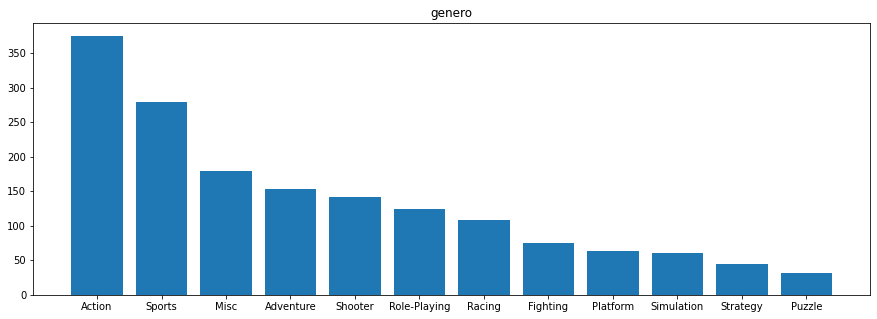

In [ ]:
bar_graphic = ["plataforma", "genero"]
histogram = []

for col in df.columns:
    if col in bar_graphic:
        plt.figure(figsize=(15,5))
        x = df[col].value_counts(dropna=False).index.tolist()
        x = [str(item) for item in x]
        height = df[col].value_counts(dropna=False).values.tolist()
        plt.bar(x=x, height=height)
        plt.title(col)
        plt.show()

#### Abaixo foi gerado um histograma visando facilitar o entendimento do número de jogos publicados por editoras. O que o gráfico nos mostra é que existem muitas editoras que publicam poucos jogos e poucas editoras que possuem uma quantidade grande de jogos publicados.

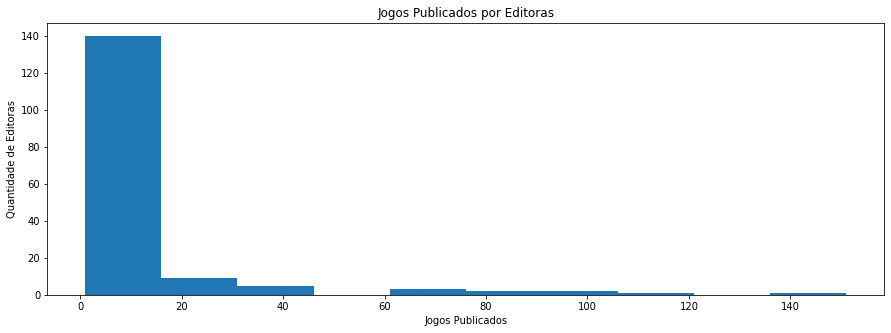

In [ ]:
plt.figure(figsize=(15,5))
x = df["editora"].dropna().value_counts().values.tolist()
plt.hist(x)
plt.xlabel("Jogos Publicados")
plt.ylabel("Quantidade de Editoras")
plt.title("Jogos Publicados por Editoras")
plt.show()

#### Foi feita então uma busca e contagem dos jogos que são multiplataforma, que totalizaram 179 jogos. Além disso,  existem na base 1419 jogos diferentes entre si.

In [ ]:
index = df["nome"].value_counts().index.tolist()
values = df["nome"].value_counts().values.tolist()


repeated_names = []
for i in range(len(values)):
    if values[i] > 1:
        repeated_names.append(index[i])

print("Unique Names: {}".format(len(df["nome"].unique())))
print("Multiplataform Games: {}".format(len(repeated_names)))
print(repeated_names)

Unique Names: 1419
Multiplataform Games: 179
['Madden NFL 11', 'FIFA Soccer 14', 'Major League Baseball 2K12', 'Disney Sing It! High School Musical 3: Senior Year', 'Army of Two: The 40th Day', 'The Simpsons Game', 'Hellboy: The Science of Evil', 'Transformers: The Game', 'Battlefield 4', 'Madden NFL 12', 'Iron Man', 'DiRT 2', 'Angry Birds: Star Wars', 'Street Fighter X Tekken', 'Skylanders SWAP Force', 'Major League Baseball 2K8', 'Tiger Woods PGA Tour 11', 'Brunswick Pro Bowling', 'LEGO Pirates of the Caribbean: The Video Game', 'Ice Age: Dawn of the Dinosaurs', 'NBA 2K11', "Dante's Inferno", 'Pro Evolution Soccer 2013', 'World Series of Poker 2008: Battle for the Bracelets', 'LEGO Harry Potter: Years 5-7', 'Wall-E', 'Planet 51', 'F1 2011', "Cabela's North American Adventures", "Skylanders: Spyro's Adventure", 'WRC: FIA World Rally Championship', 'Skylanders Giants', 'FIFA Soccer', 'Turning Point: Fall of Liberty', 'The Amazing Spider-Man (Console Version)', 'Brink', 'Backyard Sports

#### Foi feito então uma um agrupamento por gênero e plataforma, para tentar entender a relação entre a quantidade de vendas e o gênero/plataforma do jogo. Foram plotados ao todos 4 gráficos, dos quais foram utilizados as relações de vendas por gênero e vendas por plataforma, ambas as plotagens utilizando as métricas de média e mediana.

#### Nota-se no caso de vendas por gênero que, pela média, os jogos de plataforma, tiro e diversos possuem respectivamente, o maior número de vendas. Já observando pela mediana, os maiores responsáveis pelas vendas são os jogos de tiro, seguido por luta e plataforma.

#### Já observando a relação entre vendas e plataforma, pela média os jogos de X360, PS4, PS3 e Wii,  respectivamente, são os que vendem mais. Já observando a mediana, as vendas de jogos para PS4 são muito superiores as demais, que são X360, XOne e PS3.

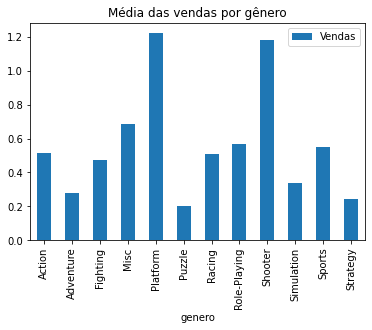

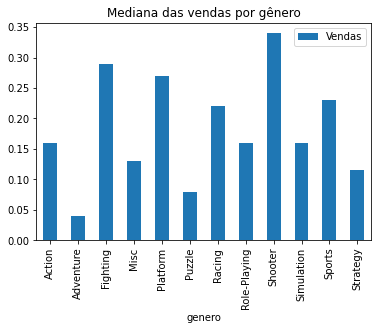

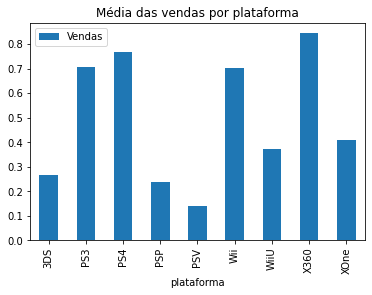

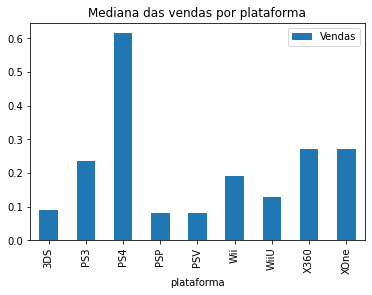

In [ ]:
genre = df[['genero', 'vendas']].dropna()
platform = df[['plataforma', 'vendas']].dropna()

axes = []
genre.groupby('genero').mean().plot.bar(title='Média das vendas por gênero').legend(['Vendas'])
genre.groupby('genero').median().plot.bar(title='Mediana das vendas por gênero').legend(['Vendas'])
platform.groupby('plataforma').mean().plot.bar(title='Média das vendas por plataforma').legend(['Vendas'])
platform.groupby('plataforma').median().plot.bar(title='Mediana das vendas por plataforma').legend(['Vendas'])

#### Foi feita uma análise buscando encontrar alguma relação entre a data de lançamento do jogo, com seu número de vendas. Para isso os atributos com as datas de lançamento foram tratadas e foi utilizado apenas o ano dos lançamentos.
#### Percebe-se que temos alguns anos de lançamento de 2014 que deveriam ser tratados, como por exemplo o TBA ("To be announced") e Q2 2014, que não conseguimos informações sobre o que seria. Tomando como base os demais anos, utilizando a média foi possível perceber que o ano de 2010 e 2007 tiveram mais vendas, enquanto o de 2011 foi o que vendeu menos. Nas medianas, a diferença no número de vendas anual foi bastante pequena. Em ambas as métricas anteriores, não foi reconhecido nenhum comportamento específico. Já observando o número de lançamentos por ano, nota-se que o gráfico tem forma parecida com uma distribuição Gaussiana.

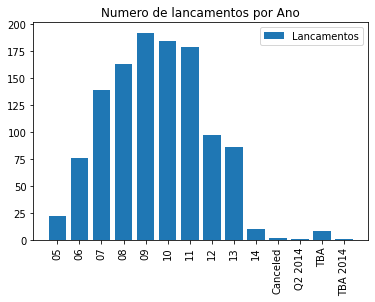

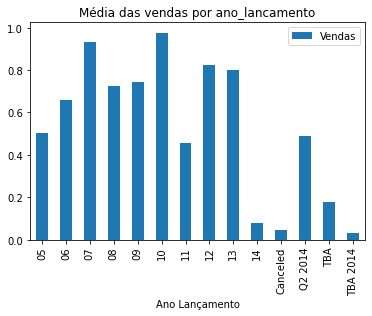

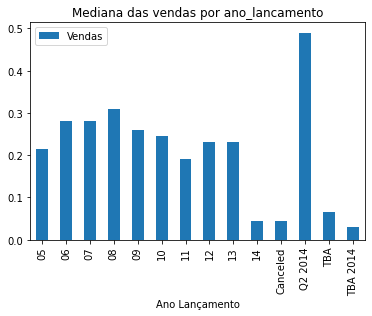

In [ ]:
releaseDates = df['lancamento'].values
# print(releaseDates)
releaseYears = []
for date in releaseDates:
  if isinstance(date, str):
    splitted = date.split('-')[-1]
    if splitted == '2007':
        splitted = '07'
    releaseYears.append(splitted)
  else:
    releaseYears.append(date)

df['ano_lancamento'] = releaseYears

releaseYear = df[['ano_lancamento', 'vendas']].dropna()

x = df['ano_lancamento'].value_counts(dropna=True, sort=False).sort_index().index.tolist()
height = df['ano_lancamento'].value_counts(dropna=True, sort=False).sort_index().values.tolist()
plt.bar(x=x, height=height)
plt.xticks(rotation=90)
plt.legend(['Lancamentos'])
plt.title('Numero de lancamentos por Ano')
plt.show()

releaseYear.groupby('ano_lancamento').mean().plot.bar(title='Média das vendas por ano_lancamento', xlabel='Ano Lançamento').legend(['Vendas'])
releaseYear.groupby('ano_lancamento').median().plot.bar(title='Mediana das vendas por ano_lancamento', xlabel='Ano Lançamento').legend(['Vendas'])

#### Após realizar a análise por ano, decidimos fazer o mesmo para os meses. Foi possível perceber que nos meses do fim do ano, principalmente outubro e novembro, a quantidade de lançamentos é consideravelmente maior que nos demais.

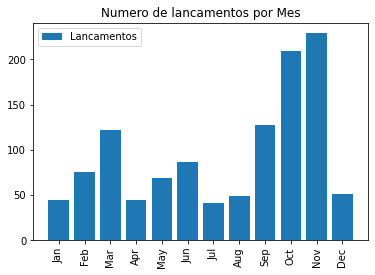

In [ ]:
releaseDates = df['lancamento'].values
# print(releaseDates)
releaseMonths = []
for date in releaseDates:
  if isinstance(date, str):
    splitted = date.split('-')
    if len(splitted) > 1:
        if splitted[1] == '10':
            splitted[1] = 'Oct'
        releaseMonths.append(splitted[1])
    else:
        releaseMonths.append(float('NaN'))
  else:
    releaseMonths.append(float('NaN'))

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['mes_lancamento'] = pd.Categorical(releaseMonths, categories=months)

x = df['mes_lancamento'].value_counts(dropna=True, sort=False).index.tolist()
height = df['mes_lancamento'].value_counts(dropna=True, sort=False).values.tolist()
plt.bar(x=x, height=height)
plt.xticks(rotation=90)
plt.legend(['Lancamentos'])
plt.title('Numero de lancamentos por Mes')
plt.show()

#### Valores não reconhecidos no campo 'ano_lancamento', que é a string TBA(_to be announced_) que seria 'A ser anunciado' e tdb(_to be determined_) 'a ser determinado'.

In [ ]:
display(df[df['ano_lancamento'] == 'TBA' ])
display(df[df['avaliacao-usuarios'] == 'tbd' ])

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante,ano_lancamento,mes_lancamento
39,Battle vs. Chess,PS3,Misc,TopWare Interactive,0.03,TBA,NaN,NaN,NaN,NaN,TopWare Interactive,TBA,NaN
248,Dragon Quest X,Wii,Role-Playing,Square Enix,0.81,TBA,NaN,NaN,NaN,NaN,Square Enix,TBA,NaN
378,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,0.23,TBA,64.0,6.0,NaN,NaN,Sidhe Interactive,TBA,NaN
561,Battle vs. Chess,X360,Misc,TopWare Interactive,0.02,TBA,NaN,NaN,NaN,NaN,TopWare Interactive,TBA,NaN
737,Horrid Henry: Missions of Mischief,Wii,Adventure,SouthPeak Games,0.01,TBA,NaN,NaN,NaN,NaN,Asylum Entertainment,TBA,NaN
756,Pro Evolution Soccer 2014,3DS,Action,Konami Digital Entertainment,0.07,TBA,NaN,NaN,NaN,NaN,Konami,TBA,NaN
1329,Family Trainer: Treasure Adventure,Wii,Sports,Namco Bandai Games,0.06,TBA,NaN,NaN,NaN,NaN,Namco Bandai Games,TBA,NaN
1400,Dragon Quest X,WiiU,Role-Playing,Square Enix,0.18,TBA,NaN,NaN,NaN,NaN,Square Enix,TBA,NaN


,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante,ano_lancamento,mes_lancamento
4,NBA 2K11,Wii,Sports,Take-Two Interactive,0.47,19-Oct-10,NaN,NaN,tbd,NaN,Visual Concepts,10,Oct
6,DT Carnage,PSP,Racing,Agetec,0.04,21-Apr-09,NaN,NaN,tbd,NaN,Axis Entertainment,09,Apr
14,Hotel for Dogs,Wii,Simulation,505 Games,0.05,6-Jan-09,NaN,NaN,tbd,NaN,505 Games,09,Jan
31,Cabela's Legendary Adventures,Wii,Sports,Activision,0.17,17-Sep-08,NaN,NaN,tbd,NaN,FUN Labs,08,Sep
36,Babysitting Mama,Wii,Simulation,505 Games,0.48,5-Nov-10,NaN,NaN,tbd,NaN,Cooking Mama Limited,10,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,Dreamworks Madagascar Kartz,Wii,Racing,Activision,0.47,27-Oct-09,NaN,NaN,tbd,NaN,Activision,09,Oct
1612,Kart Racer,Wii,Racing,Nordic Games,0.05,16-Mar-11,NaN,NaN,tbd,NaN,Nordic Games Publishing,11,Mar
1613,Skylanders SWAP Force,Wii,Platform,Activision,1.49,13-Oct-13,NaN,NaN,tbd,NaN,Beenox,13,Oct
1621,Major League Baseball 2K12,Wii,Sports,Take-Two Interactive,0.13,6-Mar-12,NaN,NaN,tbd,NaN,Visual Concepts,12,Mar


#### Considerando que a coluna "avaliacao-usuarios" é uma coluna de objects, foi necessário convertê-la para float64, entretanto para que essa conversão fosse executada foi necessário substituir alguns valores que não representavam números reais, tais como o valor "tbd" que aparecia em diversas linhas. Nesse caso, o valor "tbd" foi substituido por "NaN", e a conversão foi executada em seguida.

#### Ao observar os atributos 'Avaliação Usuários' e 'Avaliação Críticos', foi possível perceber que a primeira parecia estar descrita entre [0, 10] enquanto a segunda entre [0, 100]. Neste trabalho nós utilizamos como premissa que os intervalos de valores destas colunas estavam entre os apresentados anteriormente. Para podermos realizar uma comparação entre as avaliações dos críticos e dos usuários, foi gerada uma nova coluna para avaliação dos usuários, na qual todos os elementos foram multiplicados por 10. Ressaltando que os limites de ambas as avaliações foram inferidos dos dados da tabela, como não sabemos a fonte, não é possível afirmar que realmente os limites sejam esses.

#### Primeiro foram impressas as descrições estatísticas de ambas as colunas consideradas, e em seguida, os boxplots dessas colunas foram plotados. Através do gráfico e das estatísticas impressas podemos perceber que os valores da média, mediana, desvio padrão, primeiro quartil, mediana, terceiro quartil e máximo são bem parecidos, havendo uma maior diferença no valor mínimo. Nota-se que a avaliação dos usuários possui um número maior de _outliers_.


count    916.000000
mean      67.878821
std       14.291178
min       19.000000
25%       58.000000
50%       70.000000
75%       79.000000
max       97.000000
Name: avaliacao-criticos, dtype: float64

count    862.000000
mean       6.850696
std        1.482909
min        0.700000
25%        6.000000
50%        7.100000
75%        7.900000
max        9.600000
Name: avaliacao-usuarios, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


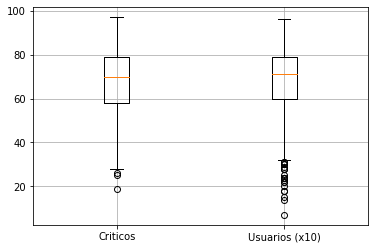

In [ ]:
df['avaliacao-usuarios'] = df['avaliacao-usuarios'].replace('tbd', 'nan').astype('float64')


display(df['avaliacao-criticos'].dropna().describe())
print('\n')
display(df['avaliacao-usuarios'].dropna().describe())

df['avaliacao-usuarios*10'] = df['avaliacao-usuarios'].dropna()*10
plt.boxplot([df['avaliacao-criticos'].dropna(), df['avaliacao-usuarios*10'].dropna()], labels=['Criticos', 'Usuarios (x10)'])
plt.grid()
plt.show()

#### Foi realizada então uma categorização de ambas as avaliações, onde o intervalo [0, 100] foi dividido em 5 partes, como as seguintes classificações: 'Péssimo', 'Ruim', 'Mediano', 'Bom' e 'Excelente'. Observando os gráficos é possível perceber que a quantidade de avaliações dos críticos foram bem parecidas com as avaliações dos usuários. A única diferença observada está no número maior de avaliações "Médias" feito pelos críticos, mas esse fato pode ter ocorrido devido a um maior número de avaliações dos críticos do que dos usuários.

count    862.000000
mean      68.506961
std       14.829087
min        7.000000
25%       60.000000
50%       71.000000
75%       79.000000
max       96.000000
Name: avaliacao-usuarios*10, dtype: float64

,avaliacao-usuarios*10,avaliacao-usuarios-categoria
0,48.0,Mediano
3,72.0,Bom
5,84.0,Excelente
7,85.0,Excelente
10,74.0,Bom
...,...,...
1622,79.0,Bom
1624,52.0,Mediano
1626,66.0,Bom
1627,38.0,Ruim


,avaliacao-criticos,avaliacao-criticos-categoria
0,37.0,Ruim
3,74.0,Bom
5,96.0,Excelente
7,76.0,Bom
10,66.0,Bom
...,...,...
1620,66.0,Bom
1622,87.0,Excelente
1624,82.0,Excelente
1626,81.0,Excelente


Bom          451
Excelente    209
Mediano      157
Ruim          40
Péssimo        5
Name: avaliacao-usuarios-categoria, dtype: int64

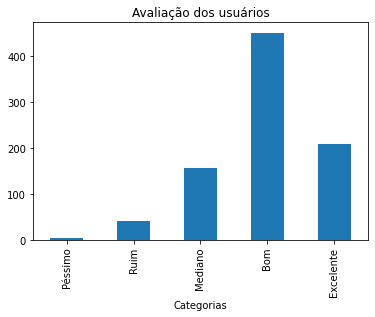

Bom          458
Excelente    211
Mediano      208
Ruim          38
Péssimo        1
Name: avaliacao-criticos-categoria, dtype: int64

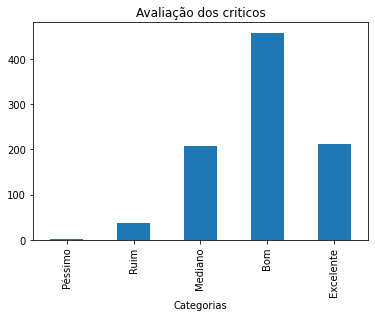

In [ ]:
display(df['avaliacao-usuarios*10'].describe())

# bins = 5
bins = [0, 19, 39, 59, 79, 100]
groups = ['Péssimo', 'Ruim', 'Mediano', 'Bom', 'Excelente']

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
df['avaliacao-usuarios-categoria'] = pd.cut(df['avaliacao-usuarios*10'], bins, labels=groups, include_lowest=True)
df['avaliacao-criticos-categoria'] = pd.cut(df['avaliacao-criticos'], bins, labels=groups, include_lowest=True)
display(df[['avaliacao-usuarios*10', 'avaliacao-usuarios-categoria']].dropna())
display(df[['avaliacao-criticos', 'avaliacao-criticos-categoria']].dropna())

display(df["avaliacao-usuarios-categoria"].value_counts())
display(df["avaliacao-usuarios-categoria"].value_counts().sort_index().plot.bar(title='Avaliação dos usuários', xlabel='Categorias'))
plt.show()
display(df["avaliacao-criticos-categoria"].value_counts())
display(df["avaliacao-criticos-categoria"].value_counts().sort_index().plot.bar(title='Avaliação dos criticos', xlabel='Categorias'))
plt.show()


#### As análises anteriores indicaram que as colunas "avaliacao-usuarios" e "avaliacao-criticos" possuem medidas de dispersão, tendência central e a forma de distribuição dos dados parecidas, portanto decidiu-se checar a correlação entra as colunas com valores reais. Nos gráficos podemos perceber que a maior correlação entre os dados ocorre entre as colunas mencionadas anteriormente, entretanto esta é uma correlação moderada.

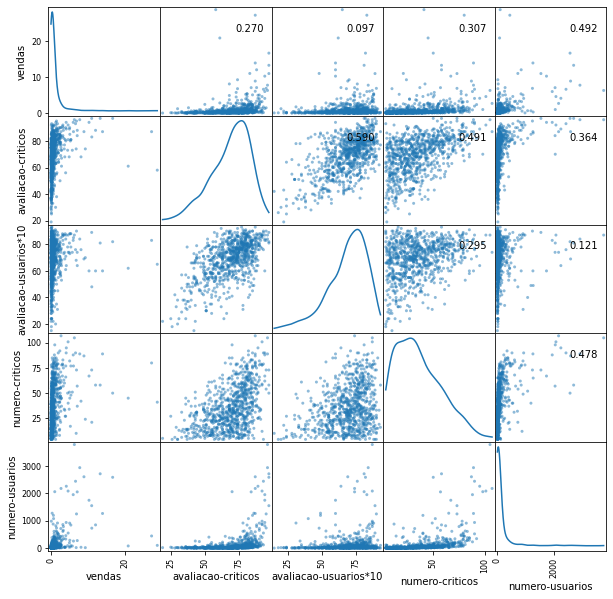

In [ ]:
d = df[["vendas", "avaliacao-criticos", "avaliacao-usuarios*10", "numero-criticos", "numero-usuarios"]].dropna()

axes = scatter_matrix(d, figsize  = [10, 10], diagonal='kde') # com estimador de densidade
# axes = scatter_matrix(d) # com histograma
corr = d.corr().values

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()